In [4]:
import pandas as pd
import json

# Reading the json as a dict
with open('title_vectors.json') as f:
    data = json.load(f)

# using the from_dict load function. Note that the 'orient' parameter 
#is not using the default value (or it will give the same error than you had)
# We transpose the resulting df and set index column as its index to get this result
df = pd.DataFrame.from_dict(data, orient='index')

df.reset_index(inplace=True)
df=df.rename(columns = {'index':'title'})
df['title'] = df['title'].str.replace(" ","_")
df['title'] = df['title'].str.replace("‘","_")
df['title'] = df['title'].str.replace("’","_")

print(df.describe())

df.iloc[:,1:].to_csv('data.csv', sep='\t', header=False, index=False)
df.iloc[:,0].to_csv('meta.csv', sep='\t', header=False, index=False)

               0           1           2           3           4           5   \
count  974.000000  974.000000  974.000000  974.000000  974.000000  974.000000   
mean     0.036973   -0.020638   -0.021701    0.022710    0.165199    0.012417   
std      0.177837    0.182354    0.171023    0.177168    0.181469    0.168156   
min     -0.562032   -0.594138   -0.479031   -0.522241   -0.498056   -0.486991   
25%     -0.077200   -0.149745   -0.137176   -0.107193    0.046922   -0.109060   
50%      0.042881   -0.032626   -0.026964    0.026203    0.174510    0.015202   
75%      0.157827    0.104265    0.102571    0.138851    0.299346    0.138523   
max      0.553712    0.460014    0.511218    0.493971    0.582829    0.524915   

               6           7           8           9      ...              90  \
count  974.000000  974.000000  974.000000  974.000000     ...      974.000000   
mean     0.011467    0.010157   -0.087305   -0.093529     ...        0.046088   
std      0.184939    0.1751

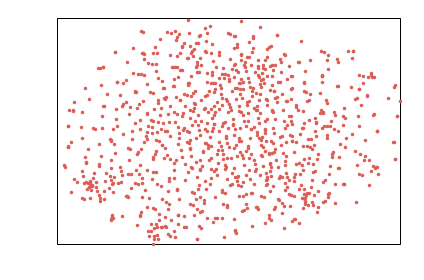

(<matplotlib.figure.Figure at 0x7fa768ae24a8>,
 [array([[-11.19279028, -11.85942944],
         [  5.71163686, -13.74503443],
         [-13.26906992,   5.62448411],
         ..., 
         [ 16.84018774,   2.00538566],
         [ -3.05095548, -19.2778319 ],
         [-14.11150303, -12.25192399]])],
 None)

In [6]:
import hypertools as hyp
import matplotlib.pyplot as plt
%matplotlib inline  

df1 = df.iloc[:,1:]
hyp.plot(df1, '.', model='TSNE', ndims=2)

In [8]:
import numpy as np

U, sigma, V = np.linalg.svd(df1)

In [13]:
print(sigma.shape, "sigma = ")
print(np.round(sigma, decimals=2))

print(V.shape, "V = ")
print(np.round(V, decimals=2))


(100,) sigma = 
[ 22.36  10.55   9.42   9.     8.88   8.17   7.96   7.87   7.68   7.44
   7.37   7.25   7.22   7.05   6.85   6.76   6.71   6.7    6.63   6.53
   6.47   6.42   6.41   6.35   6.29   6.19   6.16   6.08   6.02   5.94
   5.89   5.85   5.83   5.77   5.75   5.69   5.59   5.54   5.53   5.45
   5.43   5.36   5.28   5.27   5.23   5.22   5.18   5.12   5.09   5.04
   4.99   4.95   4.91   4.87   4.81   4.79   4.73   4.67   4.63   4.59
   4.55   4.52   4.48   4.4    4.37   4.35   4.3    4.28   4.24   4.21
   4.19   4.16   4.13   4.09   4.05   4.03   3.99   3.97   3.91   3.87
   3.81   3.79   3.76   3.71   3.67   3.64   3.57   3.56   3.52   3.49
   3.45   3.39   3.36   3.33   3.25   3.19   3.12   3.05   2.96   2.77]
(100, 100) V = 
[[ 0.06 -0.02 -0.03 ...,  0.03  0.01  0.11]
 [-0.01 -0.12 -0.   ...,  0.03 -0.05  0.11]
 [ 0.12 -0.03  0.08 ..., -0.18 -0.07  0.06]
 ..., 
 [-0.03 -0.09  0.09 ...,  0.01  0.12  0.18]
 [ 0.02 -0.05 -0.02 ...,  0.08 -0.14  0.03]
 [-0.06 -0.06  0.   ...,  0.15

In [21]:

from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=99)
kmeans.fit(df1)

centroid = kmeans.cluster_centers_
labels = kmeans.labels_

print(centroid)
print(labels)

[[ 0.00139474  0.05389717  0.06973254 ...,  0.08717074 -0.18670293
  -0.00990801]
 [ 0.1722045  -0.05192467 -0.06161455 ...,  0.09640973  0.01868211
  -0.03641544]
 [-0.14511031  0.18028836 -0.00841117 ...,  0.00524725  0.19636589
   0.03692775]
 ..., 
 [ 0.12786952 -0.11757858  0.15403036 ...,  0.13348736  0.20955719
  -0.16126726]
 [-0.06578267  0.04464871 -0.11615108 ..., -0.26422898 -0.09574017
   0.08913486]
 [-0.18914881  0.04785299  0.04342539 ..., -0.08412558 -0.03053589
   0.0845056 ]]
[97 28  6 63 48 17 51 91 13  0 31 13 10 18 61 74 52 66 81 64 64 23 77 59 77
 12 18 46 29 18 27 52 52 13 13  8 13 80 71 42 61 92 64 27 47 32  1 83 61 81
 16 15 92 89 63 18 80 13 64 31 48 24 62 74 53 30 91 15 64 20 90 23 87 34 83
 27 13 34  4 31 64 37 91 53 89  8 61 80 93 20 62 80 98 78 55  3 35 61 61  7
 71 59 25 43 79  6 10 37 16 35 24 31 23 73 37 61 68 46 30 32 37 48 40 74 66
 64 64 52 59 70 27 43 58 60 23 53 22 53 19 93 91 72 44 56 48 36 35 16 49 17
 56 38 38 52 44 16 16 63 81 55 12  4 40  5 1

In [23]:
idx = labels == 40

print(df.iloc[idx,0])

122    Investigators_Say_Philippine_Police_Murdered_T...
162    Rihanna_Drops_Epic_New_Fenty_Beauty_Ad_s_&_Fan...
229    Philippine_lawmakers_concerned_about_big_jump_...
235    Special_Effects_MakeUp_with_Seth_Miranda_and_t...
282    U.S._Settles_Lawsuit_Over_Trump's_First_Travel...
453    Countdown_to_Mater_Dei_vs._Bishop_Gorman:_Our_...
504    Mark_Zuckerberg_is_personally_responding_to_Fa...
711    Mark_Zuckerberg,_Warren_Buffett,_Tim_Cook_Urge...
742    GOP_lawmakers_urge_Trump_to_leave_DACA_alone,_...
863    Apple_joins_Bain_in_$18_billion_bid_for_Toshib...
891                     Broncos_waive_RB_Juwan_Thompson_
Name: title, dtype: object
